# diabetes

0s
==
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64
0s
==
Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64
0s
==
Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64
                          Pregnancies   Glucose  BloodPressure  SkinThickness  

C:\Users\nvqua\AppData\Local\Temp\ipykernel_4156\2246208709.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(df.columns)
C:\Users\nvqua\AppData\Local\Temp\ipykernel_4156\2246208709.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = ax.text(j, i, round(corr.iloc[i][j],2),ha="center", va="center", color="w")


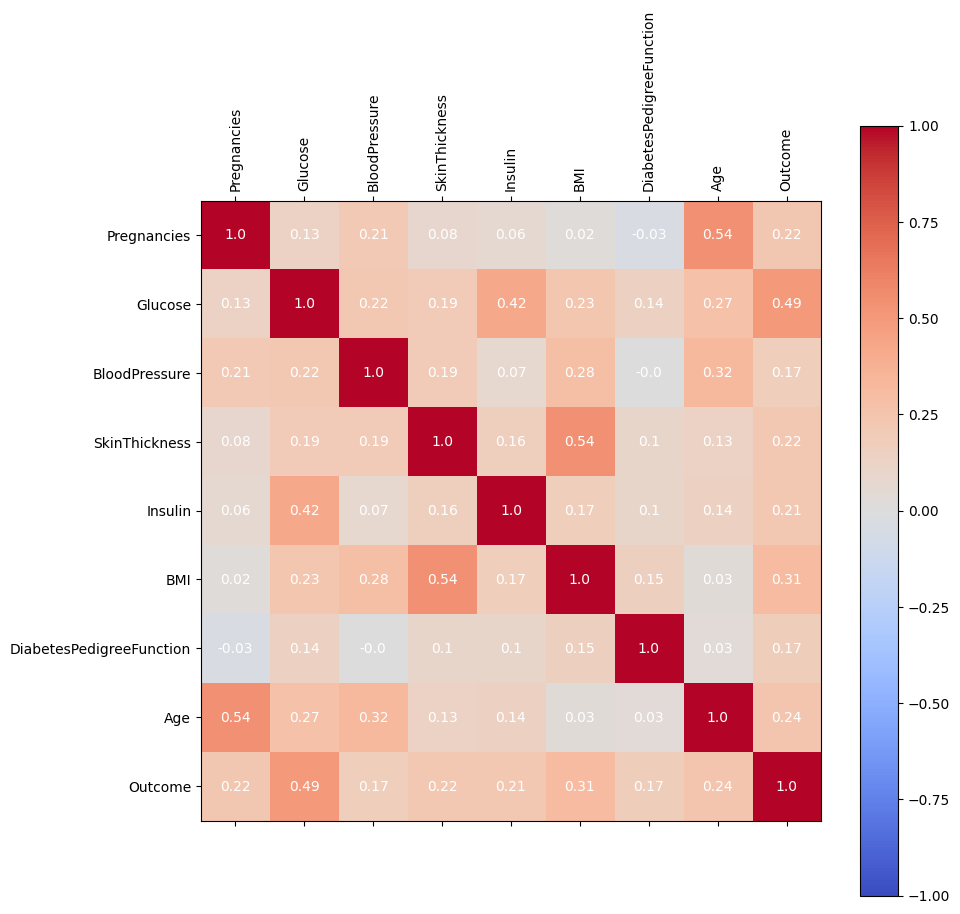

Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')
[1.         0.49292767 0.31192439 0.23835598]
0.7669856459330144
The optimal number of neighbors is 19
0.7721462747778537
0.7656527682843473
0.765704032809296
[0]
Non-diabetic
[[0.94736842 0.05263158]]
Confidence: 94.74%


C:\Users\nvqua\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\nvqua\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


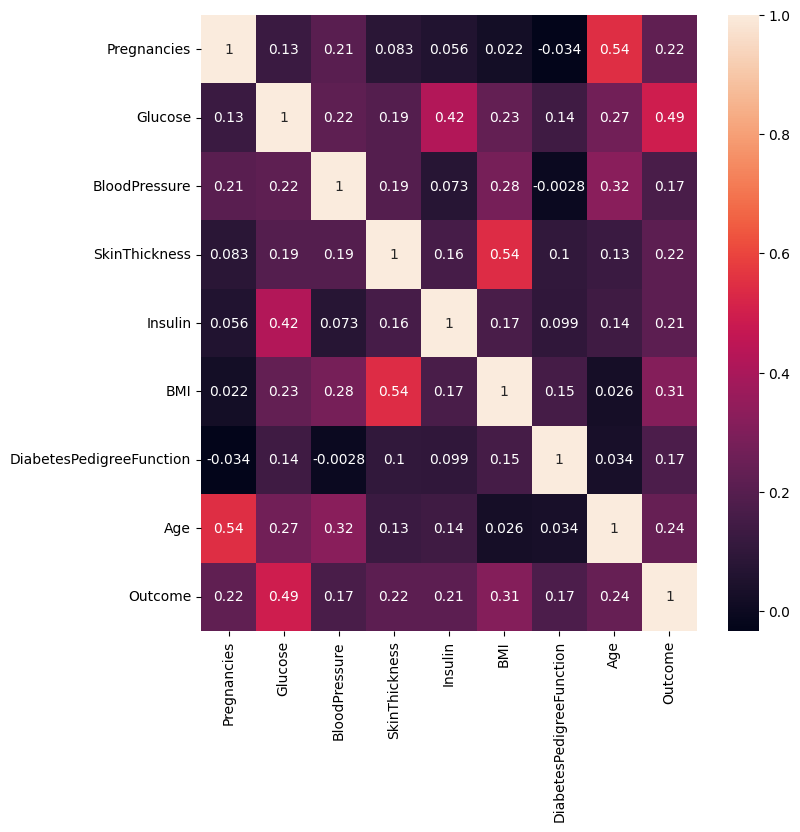

In [33]:
import numpy as np
import pandas as pd
df = pd.read_csv('diabetes.csv')
print(df.info())

#---check for null values---
# print("Nulls")
# print("=====")
# print(df.isnull().sum())

#---check for 0s---
print("0s")
print("==")
print(df.eq(0).sum())

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = \
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.nan)
#---check for 0s---
print("0s")
print("==")
print(df.eq(0).sum())

df.fillna(df.mean(), inplace = True) # replace NaN with the mean
#---check for 0s---
print("0s")
print("==")
print(df.eq(0).sum())

corr = df.corr()
print(corr)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
ax.set_xticklabels(df.columns)
plt.xticks(rotation = 90)
ax.set_yticklabels(df.columns)
ax.set_yticks(ticks)
#---print the correlation factor---
for i in range(df.shape[1]):
 for j in range(9):
     text = ax.text(j, i, round(corr.iloc[i][j],2),ha="center", va="center", color="w")
plt.show()


# Another way to plot the correlation matrix is to use Seaborn’s heatmap()
# function as follows:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
#---get a reference to the current figure and set its size---
fig = plt.gcf()
fig.set_size_inches(8,8)
#---get the top four features that has the highest correlation---
print(df.corr().nlargest(4, 'Outcome').index)
#---print the top 4 correlation values---
print(df.corr().nlargest(4, 'Outcome').values[:,8])

from sklearn import linear_model
from sklearn.model_selection import cross_val_score
#---features---
X = df[['Glucose','BMI','Age']]
#---label---
y = df.iloc[:,8]
log_regress = linear_model.LogisticRegression()
log_regress_score = cross_val_score(log_regress, X, y, cv=10, 
scoring='accuracy').mean()
print(log_regress_score)

result = []
result.append(log_regress_score)

from sklearn.neighbors import KNeighborsClassifier
#---empty list that will hold cv (cross-validates) scores---
cv_scores = []

#---number of folds---
folds = 10
#---creating odd list of K for KNN---
ks = list(range(1,int(len(X) * ((folds - 1)/folds)), 2))
#---perform k-fold cross validation---
for k in ks:
 knn = KNeighborsClassifier(n_neighbors=k)
 score = cross_val_score(knn, X, y, cv=folds, scoring='accuracy').mean()
 cv_scores.append(score)
#---get the maximum score---
knn_score = max(cv_scores)
#---find the optimal k that gives the highest score---
optimal_k = ks[cv_scores.index(knn_score)]
print(f"The optimal number of neighbors is {optimal_k}")
print(knn_score)
result.append(knn_score)



from sklearn import svm
linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, X, y,
 cv=10, scoring='accuracy').mean()
print(linear_svm_score)
result.append(linear_svm_score)
# You should get an accuracy of:
# 0.7656527682843473
# The next code snippet uses the RBF kernel:
rbf = svm.SVC(kernel='rbf')
rbf_score = cross_val_score(rbf, X, y, cv=10, scoring='accuracy').mean()
print(rbf_score)
result.append(rbf_score)

algorithms = ["Logistic Regression", "K Nearest Neighbors", "SVM Linear Kernel", "SVM RBF Kernel"]
cv_mean = pd.DataFrame(result,index = algorithms)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)

# knn = KNeighborsClassifier(n_neighbors=19)
# knn.fit(X, y)

# import pickle
# #---save the model to disk---
# filename = 'diabetes.sav'
# #---write to the file using write and binary mode---
# pickle.dump(knn, open(filename, 'wb'))

# #---load the model from disk---
# loaded_model = pickle.load(open(filename, 'rb'))

# Glucose = 65
# BMI = 70
# Age = 50
# prediction = loaded_model.predict([[Glucose, BMI, Age]])
# print(prediction)
# if (prediction[0]==0):
#  print("Non-diabetic")
# else:
#  print("Diabetic")

# proba = loaded_model.predict_proba([[Glucose, BMI, Age]])
# print(proba)
# print("Confidence: " + str(round(np.amax(proba[0]) * 100 ,2)) + "%")


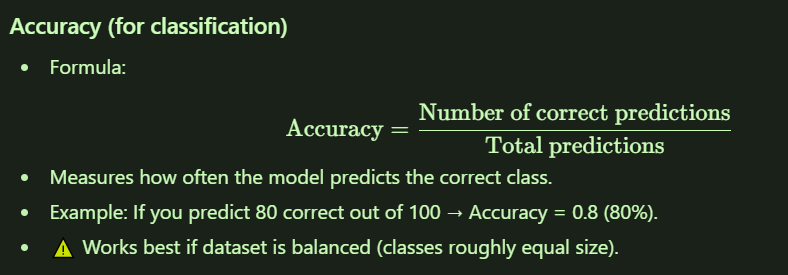
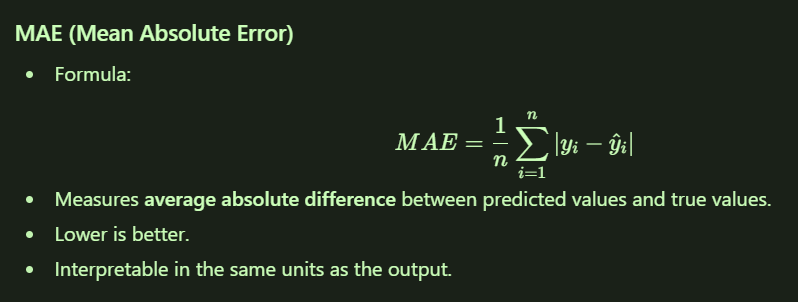
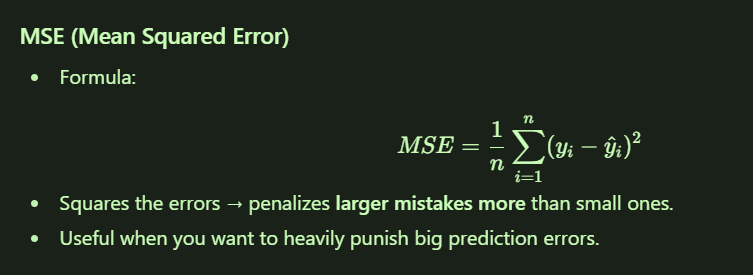
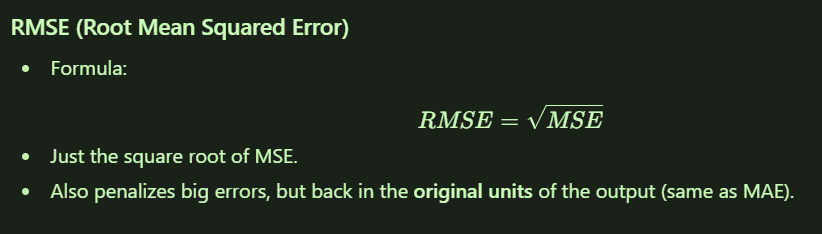
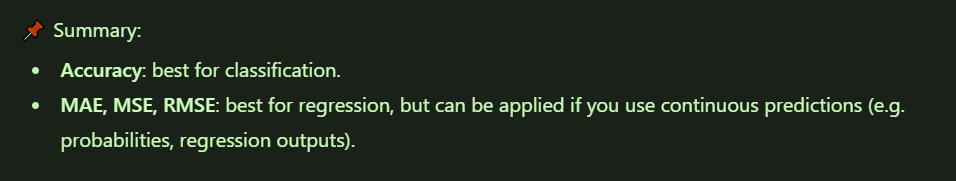


null
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64
Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


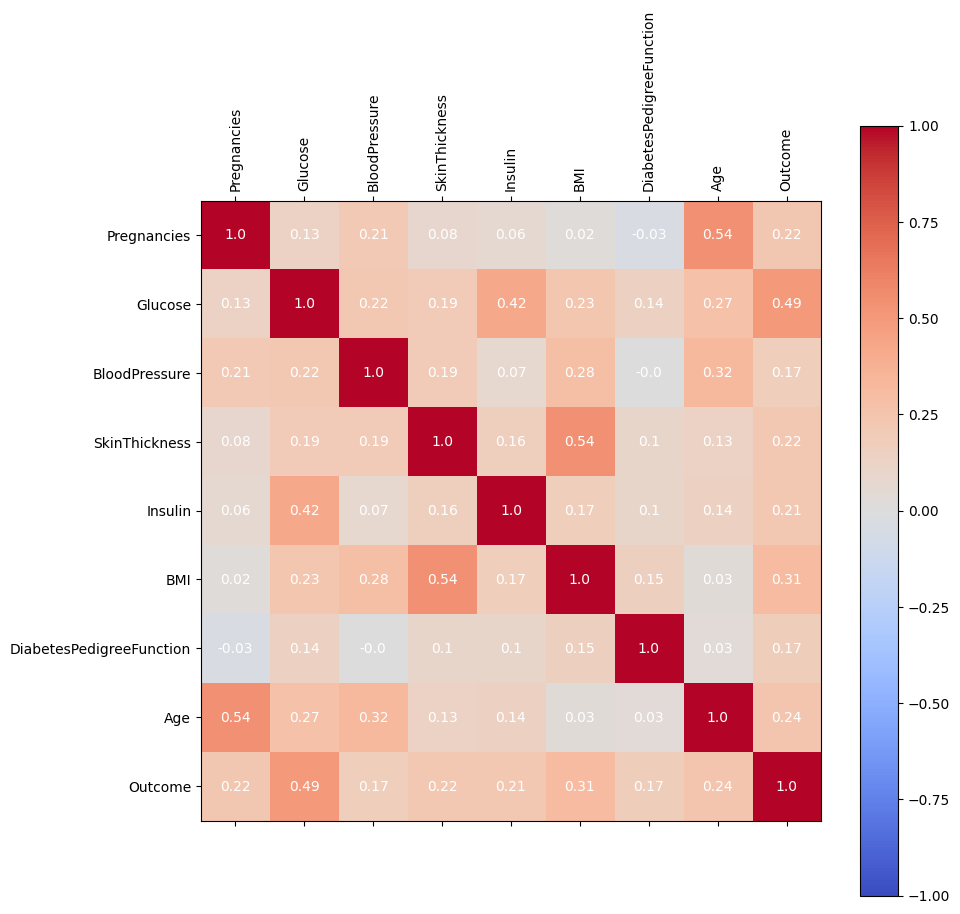

Index(['Outcome', 'Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness'], dtype='object')
[1.         0.49292767 0.31192439 0.23835598 0.22189815 0.21529921]
logistic regression score: 0.7682672590567329
The optimal number of neighbors is 21
k-nearest neighbors score: 0.7709671907040329
support vector machine linear : 0.7682843472317156
support vector machine rbf: 0.765704032809296
Linear Regression (as classifier) score: 0.7708333333333334
                                   Accuracy
K Nearest Neighbors                0.770967
Linear Regression (threshold 0.5)  0.770833
SVM Linear Kernel                  0.768284
Logistic Regression                0.768267
SVM RBF Kernel                     0.765704

📊 Logistic Regression Evaluation
Accuracy: 0.7708
MAE: 0.2292
MSE: 0.2292
RMSE: 0.4787

📊 KNN Evaluation
Accuracy: 0.7826
MAE: 0.2174
MSE: 0.2174
RMSE: 0.4663

📊 SVM Linear Evaluation
Accuracy: 0.7708
MAE: 0.2292
MSE: 0.2292
RMSE: 0.4787

📊 SVM RBF Evaluation
Accuracy: 0.7695
MAE: 0.2305

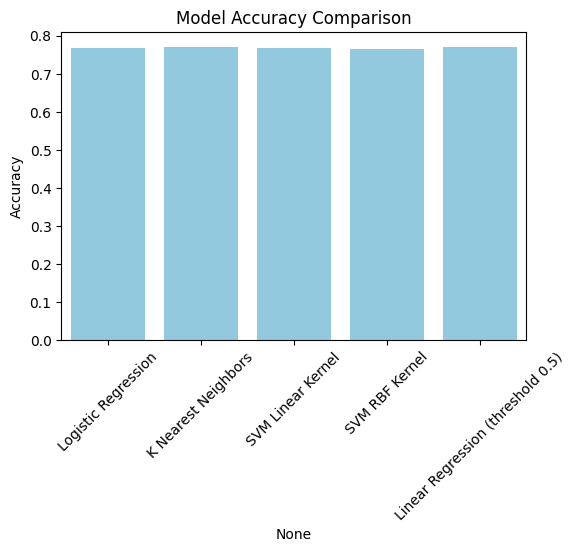

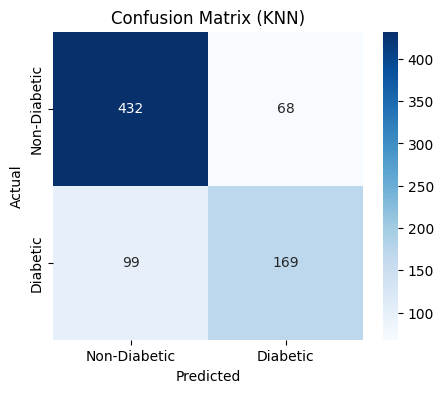

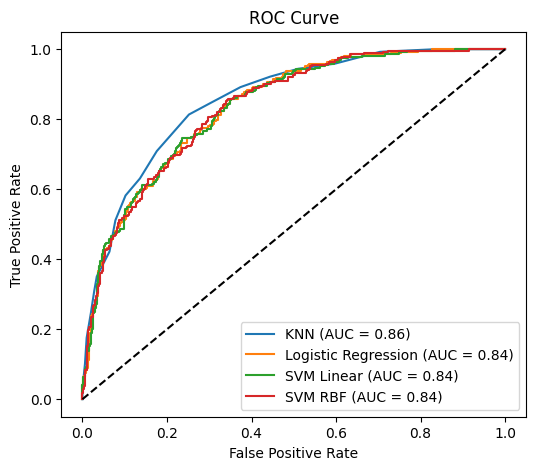

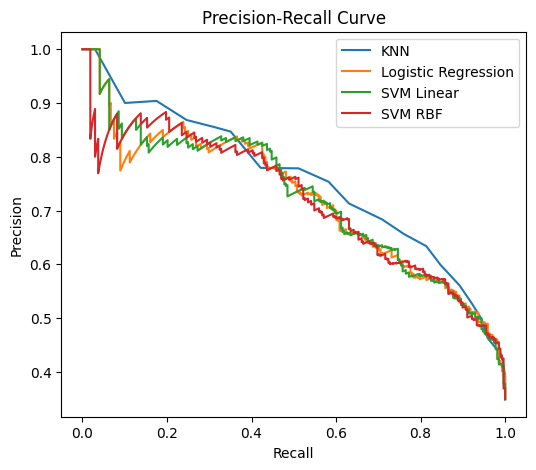

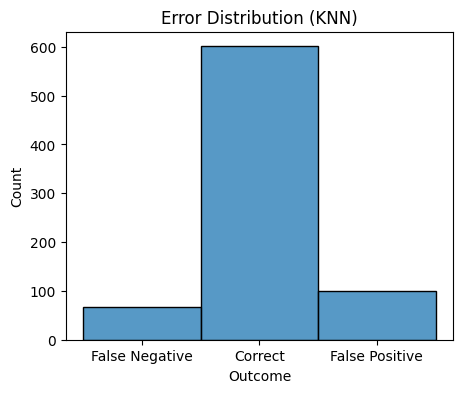

Non-diabetic
[[0.95238095 0.04761905]]
Confidence: 95.24%


In [7]:
import numpy as np
import pandas as pd
# Nguyễn Việt Quang
df = pd.read_csv('diabetes.csv')
# df.info()

# Nguyễn Việt Quang
# clean data
# check null data
print("null")
print(df.isnull().sum())
# check zero data
print(df.eq(0).sum())
# replace 0 with NaN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = \
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.nan)
# replace nan data with the mean value, implace=True -> the operation is done directly on the original data
df.fillna(df.mean(), inplace = True)
# check zero data again
print(df.eq(0).sum())
# examine the correlation between the features
corr = df.corr()
# print(corr)
import matplotlib.pyplot as plt
# visualize correlation using matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax, ax = ax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
ax.set_xticklabels(df.columns)
plt.xticks(rotation = 90)
ax.set_yticks(ticks)
ax.set_yticklabels(df.columns)
#---print the correlation factor---
for i in range(df.shape[1]):
 for j in range(9):
     text = ax.text(j, i, round(corr.iloc[i, j],2),ha="center", va="center", color="w")
plt.show()

# visualize correlation matrix with seaborn
# import seaborn as sns
# sns.heatmap(df.corr(),annot=True)
# #---get a reference to the current figure and set its size---
# fig = plt.gcf()
# fig.set_size_inches(8,8)
# #---get the top six features that has the highest correlation---
print(df.corr().nlargest(6, 'Outcome').index)
# #---print the top 6 correlation values---
print(df.corr().nlargest(6, 'Outcome').values[:,8])

# Nguyễn Việt Quang
# Logistic Regression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
# ---features (select 5)---
X = df[['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness']]
#---label---
y = df.iloc[:,8]
log_regress = linear_model.LogisticRegression()
log_regress_score = cross_val_score(log_regress, X, y, cv=10, 
scoring='accuracy').mean()
print("logistic regression score: {}".format(log_regress_score))
#store result to compare
result = []
result.append(log_regress_score)

# Nguyễn Việt Quang
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
#---empty list that will hold cv (cross-validates) scores---
cv_scores = []
#---number of folds---
folds = 10
#---creating odd list of K for KNN---
ks = list(range(1,int(len(X) * ((folds - 1)/folds)), 2))
#---perform k-fold cross validation---
for k in ks:
 knn = KNeighborsClassifier(n_neighbors=k)
 score = cross_val_score(knn, X, y, cv=folds, scoring='accuracy').mean()
 cv_scores.append(score)
#---get the maximum score---
knn_score = max(cv_scores)
#---find the optimal k that gives the highest score---
optimal_k = ks[cv_scores.index(knn_score)]
print(f"The optimal number of neighbors is {optimal_k}")
print("k-nearest neighbors score: {}".format(knn_score))
result.append(knn_score)
# ---fit the final model with optimal k---
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X, y)   # train on the full dataset

# Nguyễn Việt Quang
# support vector machine linear
from sklearn import svm
linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, X, y,
 cv=10, scoring='accuracy').mean()
print("support vector machine linear : {}".format(linear_svm_score))
result.append(linear_svm_score)

# Nguyễn Việt Quang
#support vector machine rbf
rbf = svm.SVC(kernel='rbf')
rbf_score = cross_val_score(rbf, X, y, cv=10, scoring='accuracy').mean()
print("support vector machine rbf: {}".format(rbf_score))
result.append(rbf_score)

# linear regression
# Nguyễn Việt Quang
from sklearn.linear_model import LinearRegression
# train linear regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
# predict continuous values
y_pred_cont = lin_reg.predict(X)
# convert to binary classification using 0.5 threshold
y_pred_class = (y_pred_cont >= 0.5).astype(int)
# evaluate accuracy
from sklearn.metrics import accuracy_score
lin_reg_score = accuracy_score(y, y_pred_class)
print("Linear Regression (as classifier) score: {}".format(lin_reg_score))
# add to results
result.append(lin_reg_score)



# ranking accuracy
algorithms = ["Logistic Regression","K Nearest Neighbors","SVM Linear Kernel","SVM RBF Kernel","Linear Regression (threshold 0.5)"]
cv_mean = pd.DataFrame(result,index = algorithms)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)
print(cv_mean.sort_values(by="Accuracy", ascending=False))

### evaluate
# Nguyễn Việt Quang
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
# --- Function to evaluate model ---
def evaluate_model(model, X, y, model_name, regression=False):
    y_pred = model.predict(X)

    # If regression, convert to classification (0/1)
    if regression:
        y_pred = (y_pred >= 0.5).astype(int)

    acc = accuracy_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n📊 {model_name} Evaluation")
    print(f"Accuracy: {acc:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    return [acc, mae, mse, rmse]

# --- Evaluate all trained models ---
metrics_result = {}
metrics_result["Logistic Regression"] = evaluate_model(log_regress.fit(X,y), X, y, "Logistic Regression")
metrics_result["KNN"] = evaluate_model(final_knn, X, y, "KNN")
metrics_result["SVM Linear"] = evaluate_model(linear_svm.fit(X,y), X, y, "SVM Linear")
metrics_result["SVM RBF"] = evaluate_model(rbf.fit(X,y), X, y, "SVM RBF")
metrics_result["Linear Regression (threshold 0.5)"] = evaluate_model(lin_reg, X, y, "Linear Regression", regression=True)

# --- Put results into DataFrame ---
metrics_df = pd.DataFrame(metrics_result, index=["Accuracy","MAE","MSE","RMSE"]).T
print("\n===== Final Comparison =====")
print(metrics_df.sort_values(by="Accuracy", ascending=False))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report
)

###  Visualize and show with 5 types of diagrams
# ---- 1. Accuracy Comparison (Bar Plot) ----
plt.figure(figsize=(6,4))
sns.barplot(x=cv_mean.index, y=cv_mean["Accuracy"], color="skyblue")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

# ---- 2. Confusion Matrix (for best model, e.g. KNN) ----
best_model = final_knn
y_pred = best_model.predict(X)
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic","Diabetic"], yticklabels=["Non-Diabetic","Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (KNN)")
plt.show()

# Nguyễn Việt Quang
# ---- 3. ROC Curve ----
plt.figure(figsize=(6,5))
for name, model in [("KNN", final_knn), 
                    ("Logistic Regression", log_regress.fit(X,y)), 
                    ("SVM Linear", linear_svm.fit(X,y)), 
                    ("SVM RBF", rbf.fit(X,y))]:
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X)[:,1]
    else:
        y_proba = model.decision_function(X)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min()) # scale to [0,1]

    fpr, tpr, _ = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Nguyễn Việt Quang
# ---- 4. Precision-Recall Curve ----
plt.figure(figsize=(6,5))
for name, model in [("KNN", final_knn), 
                    ("Logistic Regression", log_regress), 
                    ("SVM Linear", linear_svm), 
                    ("SVM RBF", rbf)]:
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X)[:,1]
    else:
        y_proba = model.decision_function(X)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())
    precision, recall, _ = precision_recall_curve(y, y_proba)
    plt.plot(recall, precision, label=name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# Nguyễn Việt Quang
# ---- 5. Error Distribution (Misclassifications) ----
errors = y - y_pred  # correct = 0, misclassified = +/-1
plt.figure(figsize=(5,4))
sns.histplot(errors, bins=3, discrete=True)
plt.xticks([-1,0,1], ["False Negative","Correct","False Positive"])
plt.title("Error Distribution (KNN)")
plt.show()




# save to disk so that the model can be retrieved later for prediction purpose
import pickle
#---save the model to disk---
filename = 'diabetes.sav'
# ---save the fitted model---
pickle.dump(final_knn, open(filename, 'wb'))

###---load the model from disk---
loaded_model = pickle.load(open(filename, 'rb'))
### ---prediction with 5 features---
Glucose = 65
BMI = 30
Age = 50
Pregnancies = 2
SkinThickness = 25
sample = pd.DataFrame([[Glucose, BMI, Age, Pregnancies, SkinThickness]],columns=['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness'])
prediction = loaded_model.predict(sample)
if (prediction[0]==0):
 print("Non-diabetic")
else:
 print("Diabetic")

## get the probabilities of the prediction
proba = loaded_model.predict_proba(sample)
print(proba)
print("Confidence: " + str(round(np.amax(proba[0]) * 100 ,2)) + "%")

